In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.2.0


In [6]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-06-06 11:51:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.17MB/s    in 68s     

2020-06-06 11:53:03 (4.50 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [8]:
pip install split-folders


In [9]:
pip install split-folders tqdm

In [10]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                    output='/tmp/rockpaperscissors/hasil_split',
                    seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 2946.79 files/s]


In [11]:
base_dir = '/tmp/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('/tmp/rockpaperscissors/hasil_split/train')

['rock', 'scissors', 'paper']

In [12]:
os.listdir('/tmp/rockpaperscissors/hasil_split/val')

['rock', 'scissors', 'paper']

In [0]:
# Directory rock paper scissor pada data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Directiory rock paper scissor pada data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')

In [15]:
train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      target_size=(150,150),
                      batch_size=4,
                      class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size=(150,150),
                          batch_size=4,
                          class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data = validation_generator,
    validation_steps=5,
    verbose=2
)


Epoch 1/20
25/25 - 6s - loss: 1.0994 - accuracy: 0.4000 - val_loss: 1.0720 - val_accuracy: 0.4500
Epoch 2/20
25/25 - 9s - loss: 1.0836 - accuracy: 0.4600 - val_loss: 1.0014 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 1.0578 - accuracy: 0.4000 - val_loss: 0.9451 - val_accuracy: 0.6000
Epoch 4/20
25/25 - 6s - loss: 0.8806 - accuracy: 0.6900 - val_loss: 0.5799 - val_accuracy: 0.7000
Epoch 5/20
25/25 - 6s - loss: 0.6976 - accuracy: 0.7200 - val_loss: 0.6535 - val_accuracy: 0.7500
Epoch 6/20
25/25 - 6s - loss: 0.3995 - accuracy: 0.8400 - val_loss: 0.2362 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 6s - loss: 0.3516 - accuracy: 0.9000 - val_loss: 0.2868 - val_accuracy: 0.8500
Epoch 8/20
25/25 - 6s - loss: 0.3110 - accuracy: 0.9200 - val_loss: 0.2644 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 6s - loss: 0.3819 - accuracy: 0.8800 - val_loss: 0.2530 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 6s - loss: 0.3434 - accuracy: 0.8600 - val_loss: 0.1593 - val_accuracy: 0.9500
Epoch 11/20
25/25 -

Saving 2101886081 (2).jpg to 2101886081 (2) (2).jpg
2101886081 (2).jpg
Scissor!


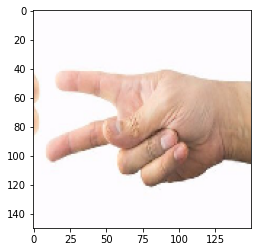

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  hasil = np.argmax(classes)

  print(fn)
  if hasil==0:
    print('Rock!')
  elif hasil==1:
    print('Scissor!')
  else:
    print('Paper!')